In [1]:
import flair
import csv
from flair.models import SequenceTagger
from flair.data import Sentence
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.dpi"] = 200.0
plt.rcParams["figure.autolayout"] = True


pd.set_option('max_columns', None)
pd.set_option("max_rows", None)

model_path = "Model/"

model = SequenceTagger.load(model_path + 'best-model.pt')

2020-10-22 12:39:22,485 loading file Model/best-model.pt


In [2]:
#nur wenn auch trainiert wurde
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_training_curves(model_path +'loss.tsv')
plotter.plot_weights('Modell/weights.txt')
plotter.plot_learning_rate(model_path + 'loss.tsv')

FileNotFoundError: [Errno 2] No such file or directory: 'Model/loss.tsv'

<Figure size 3000x2000 with 0 Axes>

In [3]:
# Tagging Beispiel
sentence = Sentence('we will rock you')
model.predict(sentence)
print(sentence.to_tagged_string())

we <B_C> will rock you


In [4]:
# Aufbereitung der Testdaten
# in Format [['i', 'O', 'O'], ['can', 'O', 'O'],....]]
test_results= model_path + 'test.tsv'
tsv_file = open(test_results)
tsv_data = csv.reader(tsv_file, delimiter =" ")
test_data = []
end = ['END', 'END', 'END']

for row in tsv_data:
    if not row:
        test_data.append(end)
    else:
        test_data.append(row)

tsv_file.close()

FileNotFoundError: [Errno 2] No such file or directory: 'Model/test.tsv'

In [5]:
counter_wrong = 0
wrong_tokens =[]
counter_right = 0
right_tokens =[]
all_tokens = []

for token in test_data:
    if token[1] != token[2]:
        counter_wrong += 1
        wrong_tokens.append(token)
        all_tokens.append(token)
    elif token[1] == token[2]:
        if token[1] != "END":
            counter_right += 1 
        right_tokens.append(token)
        all_tokens.append(token)

In [6]:
print("Falsch progrnostizierte Labels",counter_wrong)
print("Richtig progrnostizierte Labels",counter_right)

Falsch progrnostizierte Labels 573
Richtig progrnostizierte Labels 22002


wrong_tokens_df = pd.DataFrame(wrong_tokens)

In [7]:
wrong_tokens_df = pd.DataFrame(wrong_tokens, columns= ["Token","True","Predicted"])
right_tokens_df = pd.DataFrame(right_tokens, columns= ["Token","True","Predicted"])
all_tokens_df = pd.DataFrame(all_tokens, columns= ["Token","True","Predicted"])

AttributeError: 'AxesSubplot' object has no attribute 'figsave'

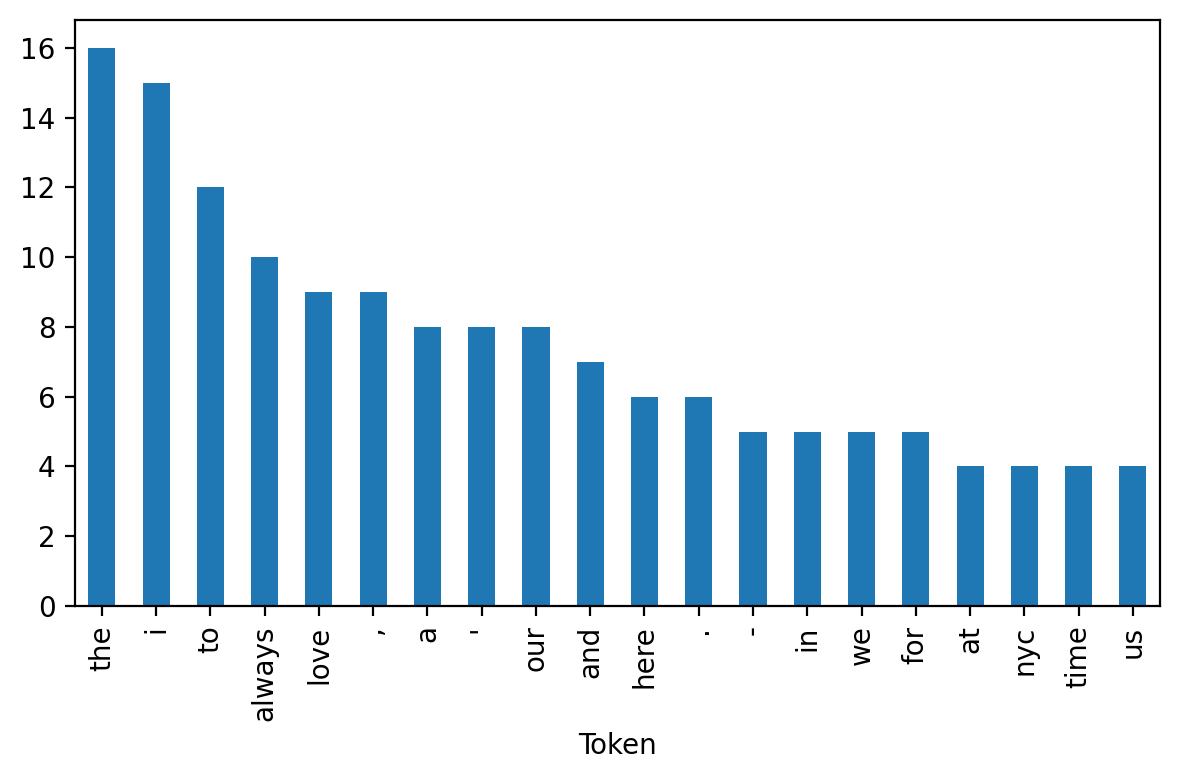

In [11]:
#Label falsch
tokens = wrong_tokens_df.value_counts("Token")
tokens[0:20].plot.bar().figsave("Anzahl der falschgelabelten Worte")

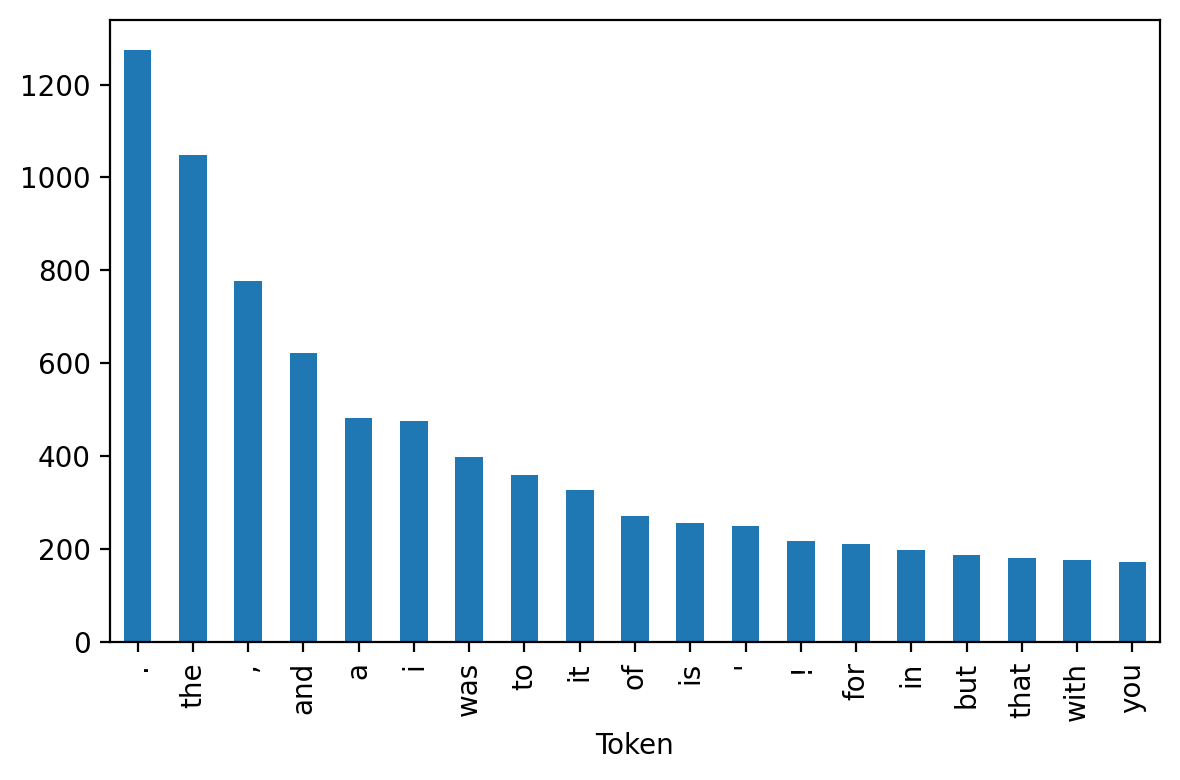

In [12]:
#Label falsch
tokens = right_tokens_df.value_counts("Token")
tokens[0:20].drop("END").plot.bar()

In [13]:
all_tokens_df.value_counts("Predicted")

Predicted
O      22215
END     1474
B_C      188
B_T       69
B_E       45
I_T       26
B_P       21
I_P       10
I_E        1
dtype: int64

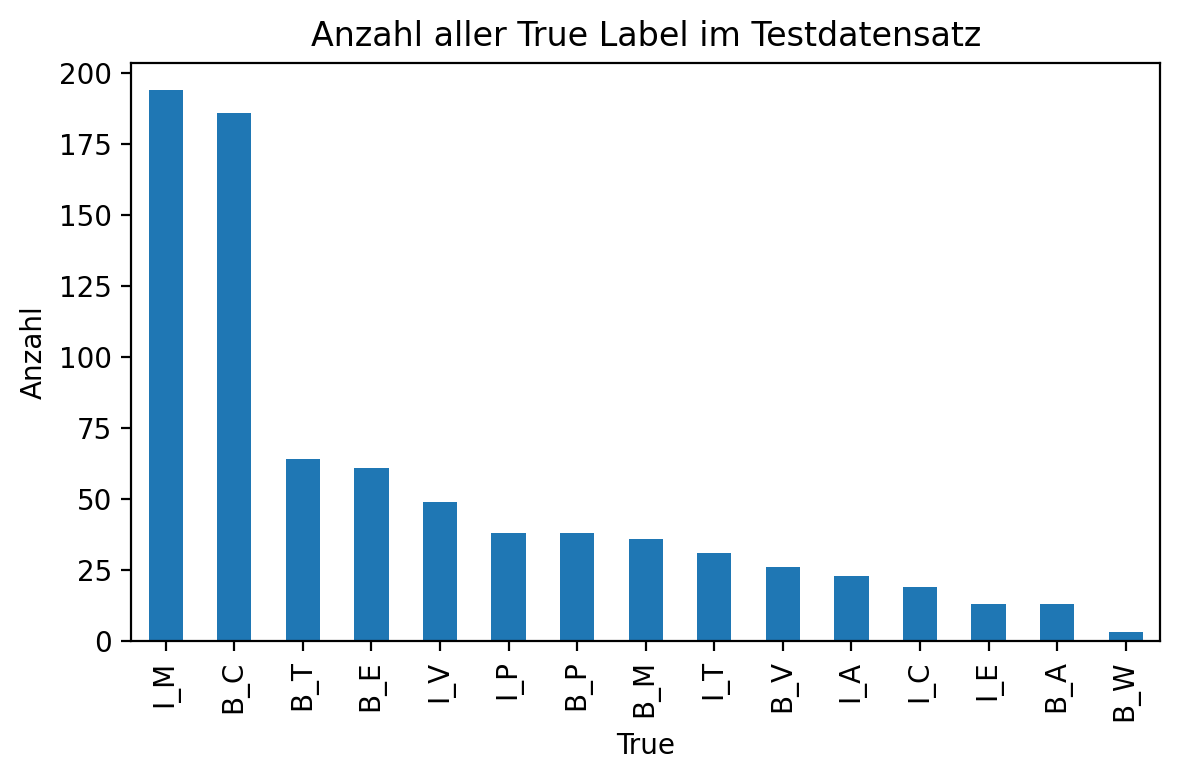

In [14]:
plt.figure()
plt.gcf().subplots_adjust(bottom=0.15)
all_tokens_df["True"].value_counts().drop("O").drop("END").plot.bar(xlabel="True", ylabel="Anzahl",title ="Anzahl aller True Label im Testdatensatz").figure.savefig('Abbildungen/trueLabel.png')
#plt.axhline(0,color ="k")

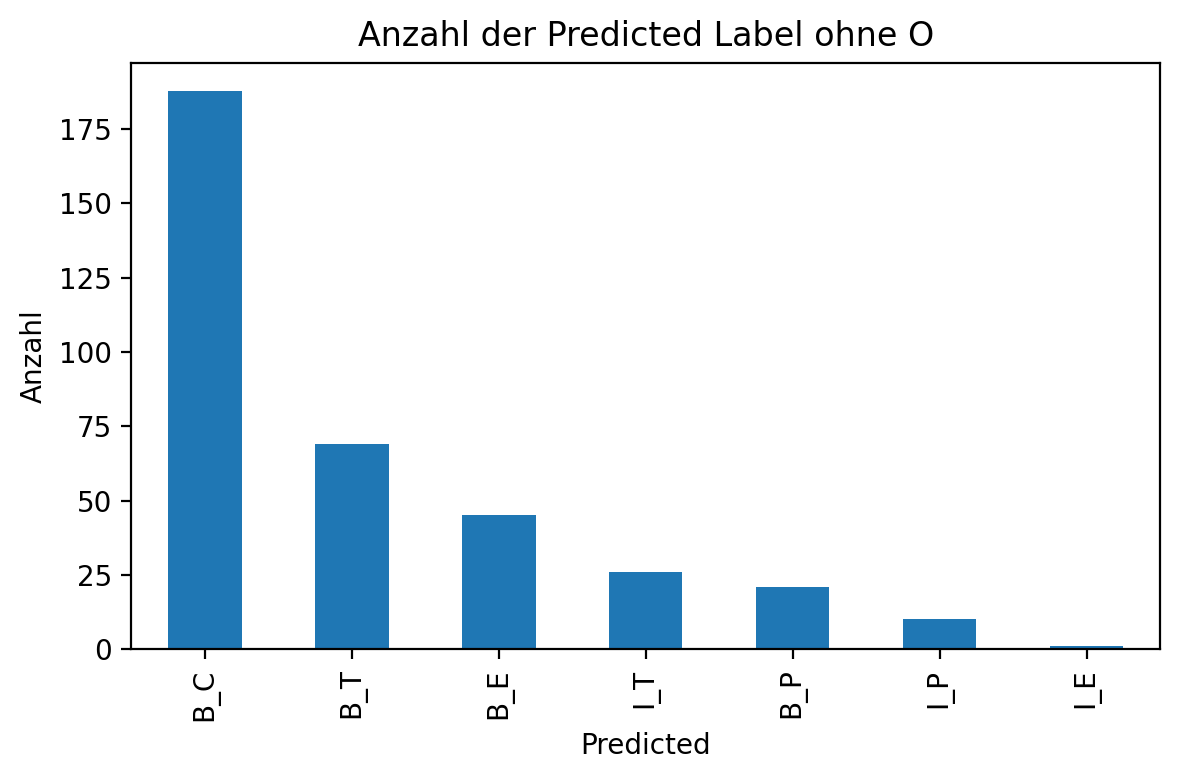

In [15]:
plt.figure()
plt.gcf().subplots_adjust(bottom=0.15)
all_tokens_df["Predicted"].value_counts().drop("O").drop("END").plot.bar(xlabel="Predicted", ylabel="Anzahl",title ="Anzahl der Predicted Label ohne O").figure.savefig('Abbildungen/predLabelwithoutO.png')
#plt.close('all')

                Token
Predicted True       
B_C       B_M       1
          I_C       2
          O        21
B_E       I_E       1
          O        17
B_P       O         9
B_T       B_M       2
          B_W       1
          O        12
I_E       O         1
I_P       O         4
I_T       B_T       2
          I_M       2
O         B_A      13
          B_C      22
          B_E      34
          B_M      33
          B_P      26
          B_T       8
          B_V      26
          B_W       2
          I_A      23
          I_C      17
          I_E      12
          I_M     192
          I_P      32
          I_T       9
          I_V      49


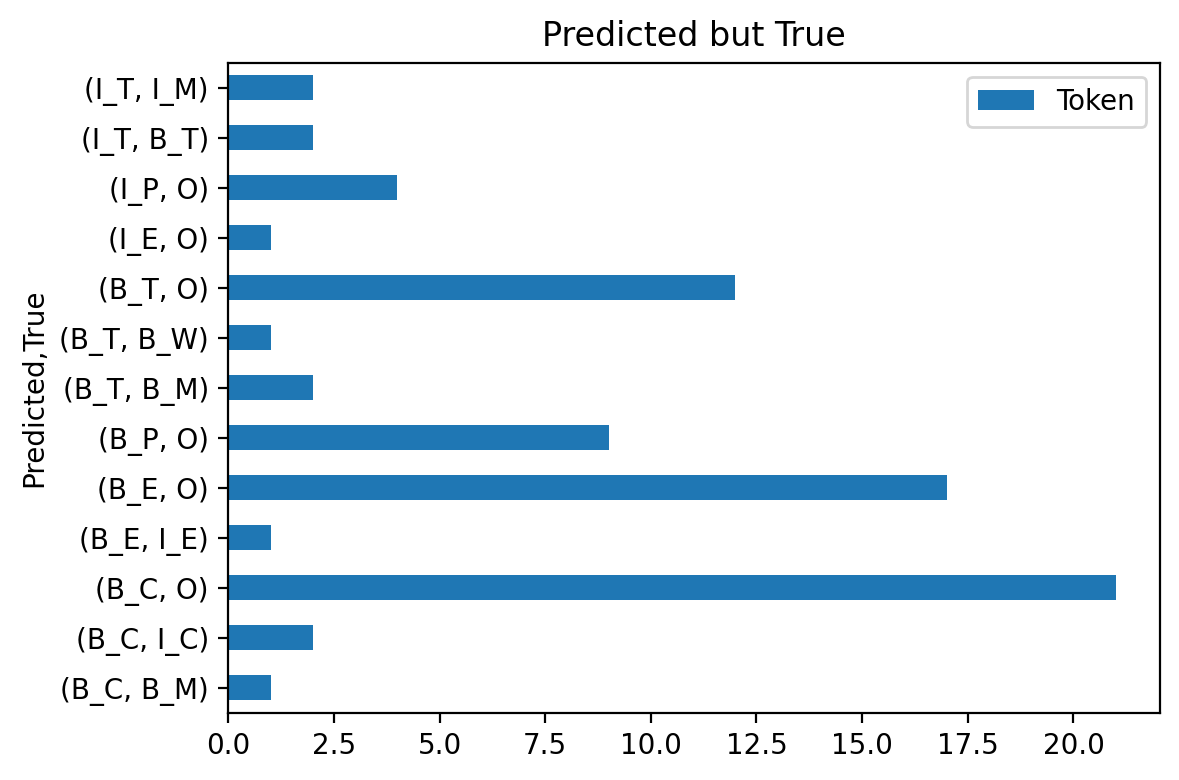

In [16]:
#Predicted Label ist eigentlich ...
print(wrong_tokens_df.groupby(["Predicted","True"]).count())


fig = wrong_tokens_df.groupby(["Predicted","True"]).count().drop("O").plot.barh(title = "Predicted but True").get_figure()
fig.savefig("Abbildungen/PredictedButTruePlot.png")


In [17]:
wrong_tokens_df.set_index(["True","Token"]).count(level="True")

,Predicted
True,
B_A,13
B_C,22
B_E,34
B_M,36
B_P,26
B_T,10
B_V,26
B_W,3
I_A,23


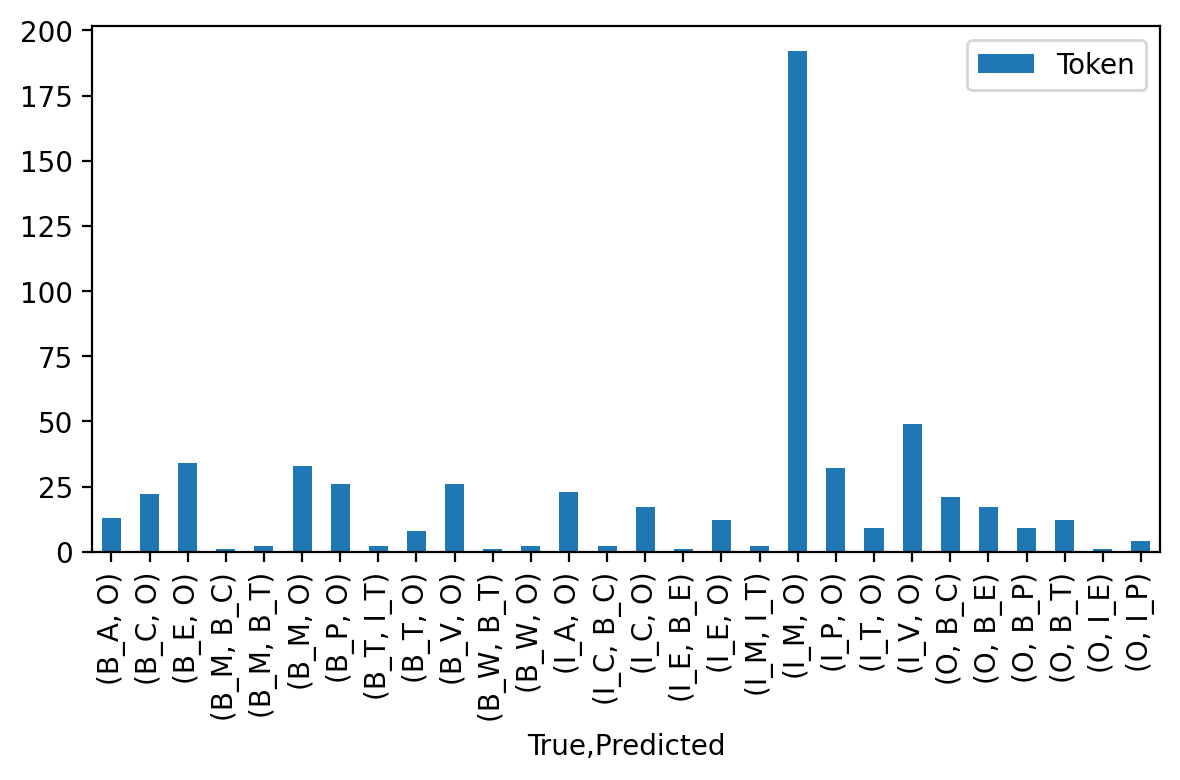

In [18]:
#Label wurde als ... Predicted
wrong_tokens_df.groupby(["True","Predicted"]).count().plot.bar()

In [19]:
test_data_df = pd.DataFrame(test_data,columns= ["Token","True","Predicted"])

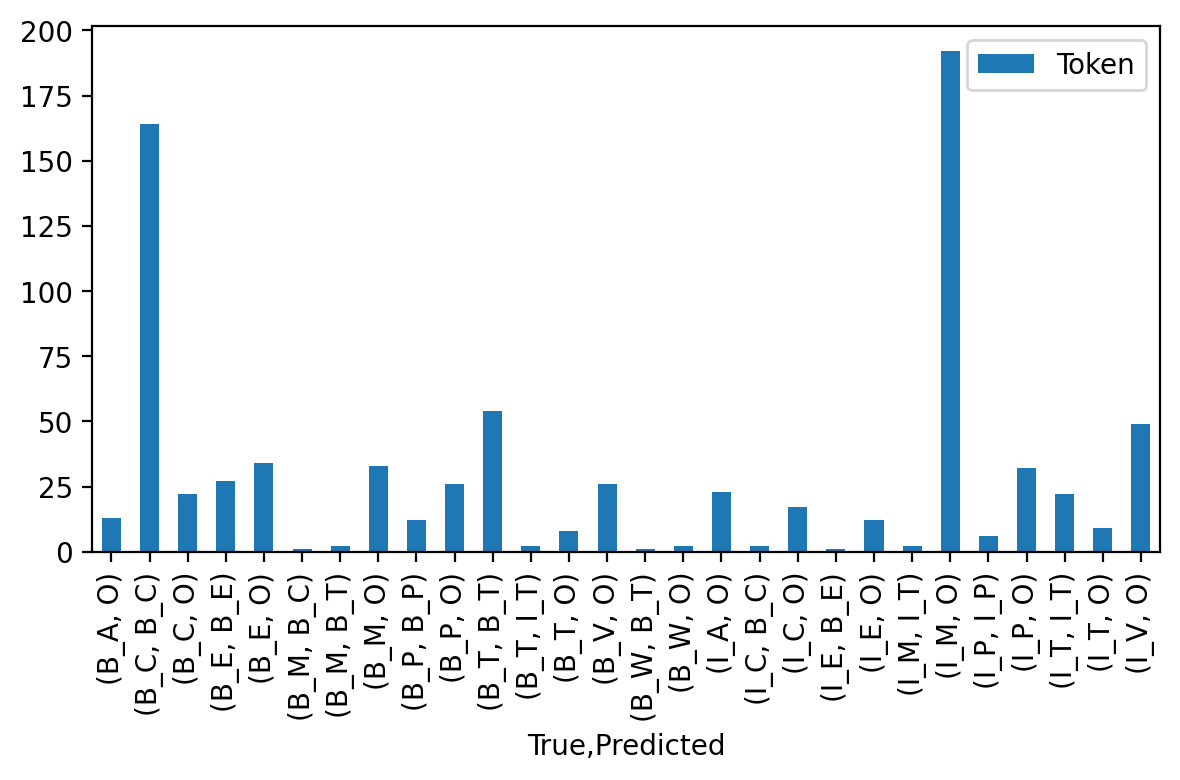

In [20]:
test_data_df.groupby(["True","Predicted"]).count().drop("O").drop("END").plot.bar()

In [21]:
test_data_df.dtypes

Token        object
True         object
Predicted    object
dtype: object

In [22]:


test_data_df.loc[(test_data_df['Token'] == "nyc")]

,Token,True,Predicted
989,nyc,B_P,B_P
1014,nyc,O,O
2246,nyc,B_P,O
11658,nyc,B_P,B_P
11726,nyc,O,B_P
13832,nyc,B_P,B_P
14697,nyc,B_P,B_P
14916,nyc,O,B_P
15859,nyc,I_A,O
17759,nyc,O,O


In [32]:
#Suche nach bestimmten Tokens mit den darum befindlichen Wörtern
searched_token = 15028
test_data_df[searched_token - 10:searched_token + 10]

,Token,True,Predicted
15018,.,O,O
15019,END,END,END
15020,okay,O,O
15021,",",O,O
15022,then,O,O
15023,.,O,O
15024,END,END,END
15025,the,O,O
15026,food,O,O
15027,is,O,O


In [239]:
test_data_df.loc[(test_data_df['True'] == "O") & (test_data_df['Predicted'] == "B_C")]

,Token,True,Predicted
2076,we,O,B_C
3521,us,O,B_C
7446,our,O,B_C
7674,peter,O,B_C
7684,friends,O,B_C
8377,our,O,B_C
10618,our,O,B_C
11433,friend,O,B_C
11737,our,O,B_C
12754,we,O,B_C


In [165]:

test_data_df.loc[(test_data_df['Predicted'] == "O") & (test_data_df['True'] == "B_M")]

,Token,True,Predicted
81,fan,B_M,O
974,read,B_M,O
2149,get,B_M,O
3422,needing,B_M,O
3642,close,B_M,O
3647,pretty,B_M,O
3993,i,B_M,O
4091,polenta,B_M,O
4458,wanted,B_M,O
4743,chipotle,B_M,O


In [223]:
#Suche nach bestimmten Tokens mit den darum befindlichen Wörtern
searched_token = 1862
test_data_df[searched_token - 10:searched_token + 10]

,Token,True,Predicted
1852,.,O,O
1853,END,END,END
1854,i,O,O
1855,went,O,O
1856,to,O,O
1857,laut,O,O
1858,this,O,O
1859,past,B_T,B_T
1860,weekend,I_T,I_T
1861,after,O,O


In [73]:
def count_true_false_predicted(search_token):
    counter_false = 0
    counter_true = 0
    for i in test_data:
        if i[0] == search_token:
            if i[1] != i[2]:
                #print("ungleich",i)
                counter_false += 1
            elif i[1] == i[2]:
                #print("gleich", i)
                counter_true += 1
            
    return search_token, counter_false, counter_true

tokens = ["we", "you", "the"]
results = []
for token in tokens:
    result = count_true_false_predicted(token)
    print(result)
    results.append(result)
 

('we', 5, 98)
('you', 3, 174)
('the', 16, 1049)


In [74]:
results

[('we', 5, 98), ('you', 3, 174), ('the', 16, 1049)]

#Sentence Level Analysis

In [75]:
import csv

sentences = []
sentence = []
end = False

tsv_file = open(test_results, newline='')
reader = csv.reader(tsv_file, delimiter=" ")
for row in reader:
    if not row:
        sentences.append(sentence)
        sentence = []
    else:
        sentence.append(row)


all_test_tokens = []
all_test_trues = []
all_test_preds = []
data_tuples =[] 
for sentence in sentences:
    sent_tokens = []
    sent_trues = []
    sent_preds = []
    evalList = []
    for word in sentence:
        sent_tokens = word[0]
        sent_trues = word[1]
        sent_preds = word[2]
        evalList.append([sent_tokens, sent_trues, sent_preds])
    #all_test_tokens.append(sent_tokens)
    #all_test_trues.append(sent_trues)
    #all_test_preds.append(sent_preds)
    data_tuples.append(evalList)
   
#Zusammenfügen

#data_tuples = list(zip(all_test_tokens, all_test_trues,all_test_preds))

#print(data_tuples[0][1])
print(data_tuples)


[[['i', 'O', 'O'], ['can', 'O', 'O'], ['not', 'O', 'O'], ['wait', 'O', 'O'], ['to', 'O', 'O'], ['go', 'O', 'O'], ['back', 'O', 'O'], ['and', 'O', 'O'], ['try', 'O', 'O'], ['.', 'O', 'O']], [['great', 'O', 'O'], ['street', 'O', 'O'], ['food', 'O', 'O'], ['.', 'O', 'O']], [['its', 'O', 'O'], ['an', 'O', 'O'], ['extremely', 'O', 'O'], ['comfortable', 'O', 'O'], ['atmosphere', 'O', 'O'], ['whether', 'O', 'O'], ['inside', 'O', 'O'], ['or', 'O', 'O'], ['in', 'O', 'O'], ['the', 'O', 'O'], ['lovely', 'O', 'O'], ['patio', 'O', 'O'], ['out', 'O', 'O'], ['back', 'O', 'O'], ['.', 'O', 'O']], [['2', 'O', 'O'], ['-', 'O', 'O'], ['washugyu', 'O', 'O'], ['salad', 'O', 'O'], ['-', 'O', 'O'], ['japanese', 'O', 'O'], ['angus', 'O', 'O'], ['with', 'O', 'O'], ['veggies', 'O', 'O'], ['.', 'O', 'O']], [['seriously', 'O', 'O'], ['.', 'O', 'O']], [['with', 'O', 'O'], ['two', 'O', 'O'], ['set', 'O', 'O'], ['of', 'O', 'O'], ['elevators', 'O', 'O'], ['going', 'O', 'O'], ['into', 'O', 'O'], ['certain', 'O', 'O'], 

In [77]:
#Falsche Sätze
counter = 0
for sent in data_tuples:
    print(sent)

[['i', 'O', 'O'], ['can', 'O', 'O'], ['not', 'O', 'O'], ['wait', 'O', 'O'], ['to', 'O', 'O'], ['go', 'O', 'O'], ['back', 'O', 'O'], ['and', 'O', 'O'], ['try', 'O', 'O'], ['.', 'O', 'O']]
[['great', 'O', 'O'], ['street', 'O', 'O'], ['food', 'O', 'O'], ['.', 'O', 'O']]
[['its', 'O', 'O'], ['an', 'O', 'O'], ['extremely', 'O', 'O'], ['comfortable', 'O', 'O'], ['atmosphere', 'O', 'O'], ['whether', 'O', 'O'], ['inside', 'O', 'O'], ['or', 'O', 'O'], ['in', 'O', 'O'], ['the', 'O', 'O'], ['lovely', 'O', 'O'], ['patio', 'O', 'O'], ['out', 'O', 'O'], ['back', 'O', 'O'], ['.', 'O', 'O']]
[['2', 'O', 'O'], ['-', 'O', 'O'], ['washugyu', 'O', 'O'], ['salad', 'O', 'O'], ['-', 'O', 'O'], ['japanese', 'O', 'O'], ['angus', 'O', 'O'], ['with', 'O', 'O'], ['veggies', 'O', 'O'], ['.', 'O', 'O']]
[['seriously', 'O', 'O'], ['.', 'O', 'O']]
[['with', 'O', 'O'], ['two', 'O', 'O'], ['set', 'O', 'O'], ['of', 'O', 'O'], ['elevators', 'O', 'O'], ['going', 'O', 'O'], ['into', 'O', 'O'], ['certain', 'O', 'O'], ['floo

[['friendly', 'O', 'O'], ['bar', 'O', 'O'], ['staff', 'O', 'O'], ['!', 'O', 'O']]
[['the', 'O', 'O'], ['seafood', 'O', 'O'], ['is', 'O', 'O'], ['super', 'O', 'O'], ['fresh', 'O', 'O'], ['and', 'O', 'O'], ['delicious', 'O', 'O'], ['!', 'O', 'O']]
[['yummy', 'O', 'O'], ['combinations', 'O', 'O'], ['of', 'O', 'O'], ['falafel', 'O', 'O'], ['sandwiches', 'O', 'O'], ['makes', 'O', 'O'], ['this', 'O', 'O'], ['a', 'O', 'O'], ['great', 'O', 'O'], ['joint', 'O', 'O'], ['for', 'O', 'O'], ['lunch', 'B_T', 'B_T'], ['/', 'I_T', 'I_T'], ['dinner', 'I_T', 'I_T'], ['or', 'O', 'O'], ['a', 'O', 'O'], ['snack', 'B_M', 'O'], ['.', 'O', 'O']]
[['i', 'O', 'O'], ['ordered', 'O', 'O'], ['combination', 'O', 'O'], ['fajitas', 'O', 'O'], [',', 'O', 'O'], ['feeling', 'O', 'O'], ['that', 'O', 'O'], ['upon', 'O', 'O'], ['perusing', 'O', 'O'], ['the', 'O', 'O'], ['menu', 'O', 'O'], [',', 'O', 'O'], ['fried', 'O', 'O'], ['and', 'O', 'O'], ['cheesy', 'O', 'O'], ['might', 'O', 'O'], ['not', 'O', 'O'], ['be', 'O', 'O'], 

[['then', 'O', 'O'], ['you', 'O', 'O'], ['tell', 'O', 'O'], ['him', 'O', 'O'], ['sauce', 'O', 'O'], ['or', 'O', 'O'], ['no', 'O', 'O'], ['sauce', 'O', 'O'], ['.', 'O', 'O']]
[['the', 'O', 'O'], ['olive', 'O', 'O'], ['oil', 'O', 'O'], ['was', 'O', 'O'], ['good', 'O', 'O'], ['.', 'O', 'O']]
[['i', 'O', 'O'], ['went', 'O', 'O'], ['on', 'O', 'O'], ['a', 'O', 'O'], ['rainy', 'B_W', 'B_T'], ['saturday', 'B_T', 'I_T'], ['and', 'O', 'O'], ['the', 'O', 'O'], ['staff', 'O', 'O'], ['was', 'O', 'O'], ['not', 'O', 'O'], ['overly', 'O', 'O'], ['accommodating', 'O', 'O'], ['it', 'O', 'O'], ['was', 'O', 'O'], ['crowded', 'O', 'O'], ['but', 'O', 'O'], ['we', 'B_C', 'B_C'], ['were', 'O', 'O'], ['barely', 'O', 'O'], ['checked', 'O', 'O'], ['on', 'O', 'O'], ['by', 'O', 'O'], ['the', 'O', 'O'], ['waitress', 'O', 'O'], ['.', 'O', 'O']]
[['when', 'O', 'O'], ['it', 'O', 'O'], ['came', 'O', 'O'], ['out', 'O', 'O'], [',', 'O', 'O'], ['it', 'O', 'O'], ['was', 'O', 'O'], ['somewhere', 'O', 'O'], ['between', 'O', 

[['it', 'O', 'O'], ['was', 'O', 'O'], ['just', 'O', 'O'], ['to', 'O', 'O'], ['clean', 'O', 'O'], ['not', 'O', 'O'], ['just', 'O', 'O'], ['bar', 'O', 'O'], ['wise', 'O', 'O'], [',', 'O', 'O'], ['but', 'O', 'O'], ['the', 'O', 'O'], ['lines', 'O', 'O'], ['and', 'O', 'O'], ['the', 'O', 'O'], ['lights', 'O', 'O'], ['.', 'O', 'O']]
[['it', 'O', 'O'], ["'", 'O', 'O'], ['s', 'O', 'O'], ['about', 'O', 'O'], ['time', 'O', 'O'], ['this', 'O', 'O'], ['soup', 'O', 'O'], ['and', 'O', 'O'], ['sandwich', 'O', 'O'], ['chain', 'O', 'O'], ['found', 'O', 'O'], ['a', 'O', 'O'], ['home', 'O', 'O'], ['up', 'O', 'O'], ['here', 'O', 'O'], ['in', 'O', 'O'], ['yorkville', 'O', 'B_P'], ['.', 'O', 'O']]
[['it', 'O', 'O'], ['was', 'O', 'O'], ['a', 'O', 'O'], ['little', 'O', 'O'], ['salty', 'O', 'O'], [',', 'O', 'O'], ['but', 'O', 'O'], ['was', 'O', 'O'], ['pretty', 'O', 'O'], ['good', 'O', 'O'], ['.', 'O', 'O']]
[['the', 'O', 'O'], ['fish', 'O', 'O'], ['itself', 'O', 'O'], ['was', 'O', 'O'], ['beautifully', 'O', 'O